#### The advantages of Random forest algorithm are as follows:-

1. Random forest algorithm can be used to solve both classification and regression problems.
2. It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
3. Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem.
4. Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
5. Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.

#### The disadvantages of Random Forest algorithm are listed below:-

1. The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
2. The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split

In [3]:
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('car_evaluation.csv', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df.shape

(1728, 7)

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
for col in df.columns:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [16]:
X = df.drop(['class'], axis=1)
y = df['class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Encoding

In [19]:
import category_encoders as ce

In [21]:
# We can see that all the variables are ordinal categorical data type.
encoders = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoders.fit_transform(X_train)
X_test = encoders.fit_transform(X_test)

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


### Random Forest Classifier model with default parameters

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
#   forest defaults to 100 trees
rfc = RandomForestClassifier(n_estimators=10, random_state=1)

In [44]:
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [45]:
print(f'Accuracy score with 10 decision trees {accuracy_score(y_test, y_pred):.4f}')

Accuracy score with 10 decision trees 0.9405


#### Using 100 trees

In [49]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)

In [50]:
rfc_100.fit(X_train, y_train)
y_pred = rfc_100.predict(X_test)

In [52]:
print(f'Accuracy score with 100 decision trees is {accuracy_score(y_test, y_pred):.4f}')

Accuracy score with 100 decision trees is 0.9440


### Find important features with Random Forest model

In [53]:
# will be using clf_100
features_score = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_score

safety      0.291034
persons     0.240318
maint       0.150723
buying      0.150072
lug_boot    0.095286
doors       0.072567
dtype: float64

### Visualizing

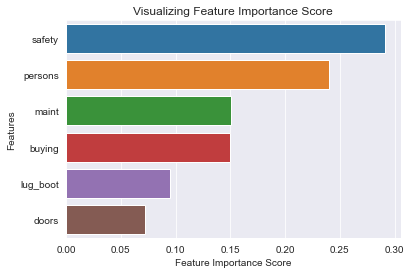

In [54]:
sns.barplot(x=features_score, y=features_score.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Feature Importance Score')
plt.show()

### Build Random Forest model on selected features

In [60]:
X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [66]:
encoders = ce.OrdinalEncoder(X_train.columns)
X = encoders.fit_transform(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [71]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [72]:
y_pred = rfc.predict(X_test)

In [73]:
print(f'Accuracy for selected features with 100 trees is {accuracy_score(y_test, y_pred)}')

Accuracy for selected features with 100 trees is 0.9369527145359019


### Applying Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm = confusion_matrix(y_test, y_pred)

In [76]:
print(f'Confusion Matrix {cm}')

Confusion Matrix [[110   8   8   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


### Classification Report

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.85      0.87       129
        good       0.64      0.90      0.75        20
       unacc       0.98      0.97      0.98       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.94       571
   macro avg       0.83      0.88      0.85       571
weighted avg       0.94      0.94      0.94       571

